# Analysis of US Coastguard GPS disruption data

## Prerequisites

### Installs

In [26]:
%pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.1 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Imports

In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
from unidecode import unidecode


## Webscrape
Run this to webscrape the data to files. If you already have the data locally, skip this section.

### Web scrape GPS interruptions

In [2]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

### Web scrape wikipedia 
#### US state codes

In [2]:
table_list_iso3166= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')

In [4]:
US_states_iso3166=table_list_iso3166[0]
US_states_iso3166['clean_state']=US_states_iso3166['Code'].apply(lambda x: x.split('-')[1])
US_states_iso3166.to_csv('US_states_iso3166.csv',index=False)

#### List of sovereign states

In [8]:
sovereign_states_list= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2')[2]
sovereign_states_list[sovereign_states_list['Country name (using title case)'].notna()].to_csv('sovereign_states.csv',index=False)

#### Web scrape UN LOCODE

In [4]:
un_locode_df= pd.read_html(r'https://service.unece.org/trade/locode/2022-1%20SubdivisionCodes.htm')

In [8]:
un_locode_df[0].to_csv('UN_LOCODE.csv',index=False)

## Processing and Analysis

### Load from csv files

In [3]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')
two_letter_codes=pd.read_csv('US_states_iso3166.csv')
sovereign_states=pd.read_csv('sovereign_states.csv')
UN_locodes=pd.read_csv('UN_LOCODE.csv')

In [4]:
gps_disruption_df['User']=gps_disruption_df['Description'].apply(lambda x: x.split('NAVCEN')[0])
gps_disruption_df['NAVCEN']=gps_disruption_df['Description'].apply(lambda x: x.split('NAVCEN')[1] if len(x.split('NAVCEN'))>1 else '')

In [5]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,USER: My mapping services are constantly searc...,sent data mapping information.
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022,"USER: For several years now, on and off throug...",: The GPS Operations Center reviewed the GPS C...
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022,USER: Our car navigation system and our mobile...,: The GPS Operations Center reviewed the GPS C...
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022,USER: Both my standalone gps and phone gps rep...,: The GPS Operations Center reviewed the GPS C...
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022,"USER: Several times, most recently yesterday, ...",sent data mapping information.
...,...,...,...,...,...,...,...,...
414,01/05/2017 4:35 UTC,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019,User: There were large spikes in geozone alarm...,: The GPS Operations Center reviewed the GPS C...
415,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,User: The GPS systems in normal mode not milit...,: Report referred to FCC. FCC conducted an inv...
416,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,User: GPS would say when you plug in that ther...,: The GPS Operations Center reviewed the GPS C...
417,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,"User: My business is located in Elizabeth, NJ....",: User provided information on how to contact ...


## Analyse disruptions by date

In [6]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

The local date is the UTC date with up to 0.5 day error. That's not bad for analysis to the nearest day. This will have to be improved for more precise analysis.

<AxesSubplot: xlabel='local_date'>

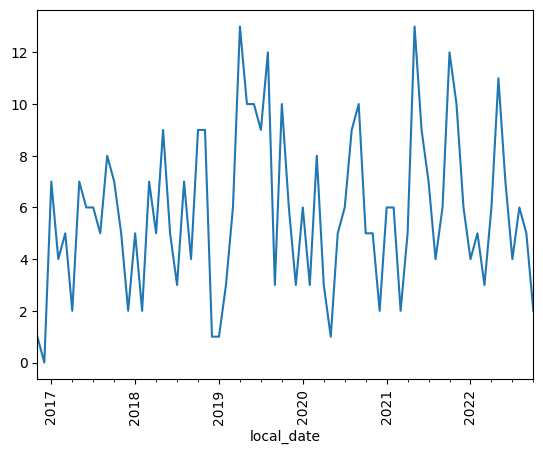

In [7]:
gps_disruption_df.resample('M', on='local_date').\
count()['Disruption Date/Time'].plot(rot=90)


## Analyse disruptions by location

### Add UK and US to two letter codes

In [8]:
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"GB",'Subdivision name (en)':"United Kingdom",'Subdivision category':"Country",'clean_state':"UK"},index=[two_letter_codes['Code'].count()])])
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"US",'Subdivision name (en)':"United States",'Subdivision category':"Country",'clean_state':"US"},index=[two_letter_codes['Code'].count()])])

### Add previous and common names to ISO list

In [9]:
sovereign_states['previous country name']=\
sovereign_states['Notes']\
.apply(lambda x: str(x)\
       .split('Previous ISO country name: ')[-1]\
       .split('(')[0]\
       .split(';')[0]\
       .split('.')[0]\
       .strip() \
       if 'Previous ISO country name: ' in str(x) \
       else None ) 


In [10]:
sovereign_states['common name']=\
sovereign_states['Notes']\
.apply(lambda x: str(x)\
       .split('common name: ')[-1]\
       .strip()\
       .split(')')[0] \
       if 'common name: ' in str(x) \
       else None )

In [11]:
sovereign_states[sovereign_states['previous country name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
27,BN,Brunei Darussalam,1974,.bn,Previous ISO country name: Brunei,Brunei,None
28,BO,Bolivia (Plurinational State of),1974,.bo,Previous ISO country name: Bolivia,Bolivia,None
29,BQ,"Bonaire, Sint Eustatius and Saba",2010,.bq,"Consists of three Caribbean ""special municipal...","Bonaire, Saint Eustatius and Saba BQ previous...",None
46,CM,Cameroon,1974,.cm,"Previous ISO country name: Cameroon, United Re...","Cameroon, United Republic of",None
55,CZ,Czechia,1993,.cz,Previous ISO country name: Czech Republic,Czech Republic,None
65,EH,Western Sahara,1974,NaN,Previous ISO country name: Spanish Sahara (cod...,Spanish Sahara,None
72,FM,Micronesia (Federated States of),1986,.fm,Previous ISO country name: Micronesia,Micronesia,None
76,GB,United Kingdom of Great Britain and Northern I...,1974,.gb (.uk),Includes Akrotiri and Dhekelia (Sovereign Base...,United Kingdom,None
107,IR,Iran (Islamic Republic of),1974,.ir,Previous ISO country name: Iran,Iran,None
116,KH,Cambodia,1974,.kh,Code taken from former name: Khmer Republic P...,"Kampuchea, Democratic",None


In [12]:
sovereign_states[sovereign_states['common name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
71,FK,Falkland Islands (Malvinas),1974,.fk,ISO country name follows UN designation due to...,None,Falkland Islands
120,KP,Korea (Democratic People's Republic of),1974,.kp,ISO country name follows UN designation (commo...,None,North Korea
121,KR,"Korea, Republic of",1974,.kr,ISO country name follows UN designation (commo...,None,South Korea
190,RU,Russian Federation,1992,.ru,ISO country name follows UN designation (commo...,None,Russia
227,TW,"Taiwan, Province of China",1974,.tw,Covers the current jurisdiction of the Republi...,None,Taiwan
240,VN,Viet Nam,1974,.vn,ISO country name follows UN designation (commo...,None,South Vietnam


In [13]:
UN_locodes['primary name']=UN_locodes['2'].apply(lambda x: unidecode(x.strip().split('[')[0]))
UN_locodes['placename_decoded']=UN_locodes['primary name'].apply(unidecode)
UN_locodes['placename_len']=UN_locodes['placename_decoded'].apply(len)
UN_locodes['alternative name']=UN_locodes['2'].apply(lambda x: unidecode(x.strip().split('[')[1].split(']')[0]) if len(x.strip().split('['))>1 else None)
UN_locodes['alternative_len']=UN_locodes[UN_locodes['alternative name'].notna()]['alternative name'].apply(len)
UN_locodes['locode']=UN_locodes['0']+'-'+UN_locodes['1']

In [14]:
UN_locodes[UN_locodes['primary name'].notna()].notna().count()['primary name']

4671

In [15]:
UN_locodes['second_code']=UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name'].str.rpartition()[2].str.partition(sep='-')[0]
UN_locodes['clean alternative name']=UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name'].str.rpartition()[0].apply(lambda x: x.strip())#.str.partition(sep='-')[0]

UN_locodes[UN_locodes['second_code']==UN_locodes['0']]

,0,1,2,3,primary name,placename_decoded,placename_len,alternative name,alternative_len,locode,second_code,clean alternative name
1216,GB,AGY,Isle of Anglesey [Sir Ynys Môn GB-YNM],Unitary authority,Isle of Anglesey,Isle of Anglesey,17,Sir Ynys Mon GB-YNM,19.0,GB-AGY,GB,Sir Ynys Mon
1228,GB,BGE,Bridgend [Pen-y-bont ar Ogwr GB-POG],Unitary authority,Bridgend,Bridgend,9,Pen-y-bont ar Ogwr GB-POG,25.0,GB-BGE,GB,Pen-y-bont ar Ogwr
1243,GB,CAY,Caerphilly [Caerffili GB-CAF],Unitary authority,Caerphilly,Caerphilly,11,Caerffili GB-CAF,16.0,GB-CAY,GB,Caerffili
1253,GB,CMN,Carmarthenshire [Sir Gaerfyrddin GB-GFY],Unitary authority,Carmarthenshire,Carmarthenshire,16,Sir Gaerfyrddin GB-GFY,22.0,GB-CMN,GB,Sir Gaerfyrddin
1256,GB,CRF,Cardiff [Caerdydd GB-CRD],Unitary authority,Cardiff,Cardiff,8,Caerdydd GB-CRD,15.0,GB-CRF,GB,Caerdydd
1261,GB,DEN,Denbighshire [Sir Ddinbych GB-DDB],Unitary authority,Denbighshire,Denbighshire,13,Sir Ddinbych GB-DDB,19.0,GB-DEN,GB,Sir Ddinbych
1284,GB,FLN,Flintshire [Sir y Fflint GB-FFL],Unitary authority,Flintshire,Flintshire,11,Sir y Fflint GB-FFL,19.0,GB-FLN,GB,Sir y Fflint
1331,GB,MON,Monmouthshire [Sir Fynwy GB-FYN],Unitary authority,Monmouthshire,Monmouthshire,14,Sir Fynwy GB-FYN,16.0,GB-MON,GB,Sir Fynwy
1334,GB,MTY,Merthyr Tydfil [Merthyr Tudful GB-MTU],Unitary authority,Merthyr Tydfil,Merthyr Tydfil,15,Merthyr Tudful GB-MTU,21.0,GB-MTY,GB,Merthyr Tudful
1347,GB,NTL,Neath Port Talbot [Castell-nedd Port Talbot GB...,Unitary authority,Neath Port Talbot,Neath Port Talbot,18,Castell-nedd Port Talbot GB-CTL,31.0,GB-NTL,GB,Castell-nedd Port Talbot


In [16]:
UN_locodes['alternative name'].unique()

array([None, 'Abu Dhabi', 'Dubai', 'Sharjah', 'Barcelona', 'La Coruna',
       'Gerona', 'Lerida', 'Lugo', 'Orense', 'Islas Baleares',
       'Pontevedra', 'Tarragona', 'Sir Ynys Mon GB-YNM',
       'Pen-y-bont ar Ogwr GB-POG', 'Caerffili GB-CAF', 'Sir Ceredigion',
       'Sir Gaerfyrddin GB-GFY', 'Caerdydd GB-CRD', 'Sir Ddinbych GB-DDB',
       'Sir y Fflint GB-FFL', 'Sir Fynwy GB-FYN', 'Merthyr Tudful GB-MTU',
       'Castell-nedd Port Talbot GB-CTL', 'Casnewydd GB-CNW',
       'Sir Benfro GB-BNF', 'Rhondda CynonTaf', 'Abertawe GB-ATA',
       'Tor-faen', 'Bro Morgannwg GB-BMG', 'Wrecsam GB-WRC', 'Hokkaido',
       'Fukushima', 'Tochigi', 'Chiba', 'Tokyo', 'Ishikawa', 'Fukui',
       'Yamanashi', 'Gifu', 'Shizuoka', 'Aichi', 'Shiga', 'Kyoto',
       'Osaka', 'Hyogo', 'Shimane', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kochi', 'Fukuoka', 'Oita', 'Kagoshima', 'Banteay Mean Choay',
       'Kracheh', 'Mondol Kiri', 'Phnum Penh', 'Preah Vihear',
       'Prey Veng', 'Pouthisat', 'Rot

### Clean up Location to get country/code 

In [17]:
def token_search(x_string):
    """ This is a function that matches a US state 2 letter code in the string and returns, or country name and returns, or previous country name and returns, or US state full name and returns"""
    for x_element in x_string.split():
        x_el_stripped=x_element.strip(',').strip(',')
        if x_el_stripped in list(two_letter_codes['clean_state' ]) and x_string.upper != x_string:
            return list(two_letter_codes[two_letter_codes['clean_state']==x_el_stripped]['Code'].to_dict().values())[0]
    for us_state in list(two_letter_codes['Subdivision name (en)']):
        if us_state.upper() in x_string.upper().replace('&','AND'):
            return  list(two_letter_codes[two_letter_codes['Subdivision name (en)']==us_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states['Country name (using title case)']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['Country name (using title case)']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['previous country name'].notna()]['previous country name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['previous country name']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['common name'].notna()]['common name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['common name']==sovereign_state]['Code'].to_dict().values())[0]
def location_search(x_string):
    for UN_location in list(UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['alternative name']==UN_location]['locode'].to_dict().values())[0]
    for UN_location in list(UN_locodes[UN_locodes['second_code']==UN_locodes['0']].sort_values('alternative_len',ascending=False)['clean alternative name']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['clean alternative name']==UN_location]['locode'].to_dict().values())[0]
    for UN_location in list(UN_locodes.sort_values('placename_len',ascending=False)['placename_decoded']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['placename_decoded']==UN_location]['locode'].to_dict().values())[0]

In [18]:
gps_disruption_df['matched_location_country_state']=gps_disruption_df['Location'].apply(token_search)
gps_disruption_df[gps_disruption_df['matched_location_country_state'].notna()].count()['Location']

296

In [19]:

gps_disruption_df['matched_user_country_state']=gps_disruption_df[gps_disruption_df['matched_location_country_state'].isna()]['User'].apply(token_search)
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()].count()['Location']

20

In [20]:

gps_disruption_df['matched_location_locode']=gps_disruption_df[gps_disruption_df['matched_location_country_state'].isna()]['Location'].apply(location_search)
gps_disruption_df[gps_disruption_df['matched_location_locode'].notna()].count()['Location']

77

In [21]:

gps_disruption_df['matched_user_locode']=gps_disruption_df[gps_disruption_df['matched_location_country_state'].isna()]['User'].apply(location_search)
#gps_disruption_df['matched_location']=gps_disruption_df.matched_location.fillna(gps_disruption_df.matched_location4)
gps_disruption_df[gps_disruption_df['matched_user_locode'].notna()].count()['Location']

96

In [22]:
gps_disruption_df['coalesce'] = \
    gps_disruption_df['matched_location_country_state'].combine_first(gps_disruption_df['matched_location_locode'])\
    .combine_first(gps_disruption_df['matched_user_country_state'])\
    .combine_first(gps_disruption_df['matched_user_locode'])

In [46]:
gps_disruption_df['coalesced_country']=gps_disruption_df['coalesce'].str.split(pat='-',n=1,expand=True)[0]

### Analyse per country, US state and UN LOCODE

<AxesSubplot: ylabel='coalesced_country'>

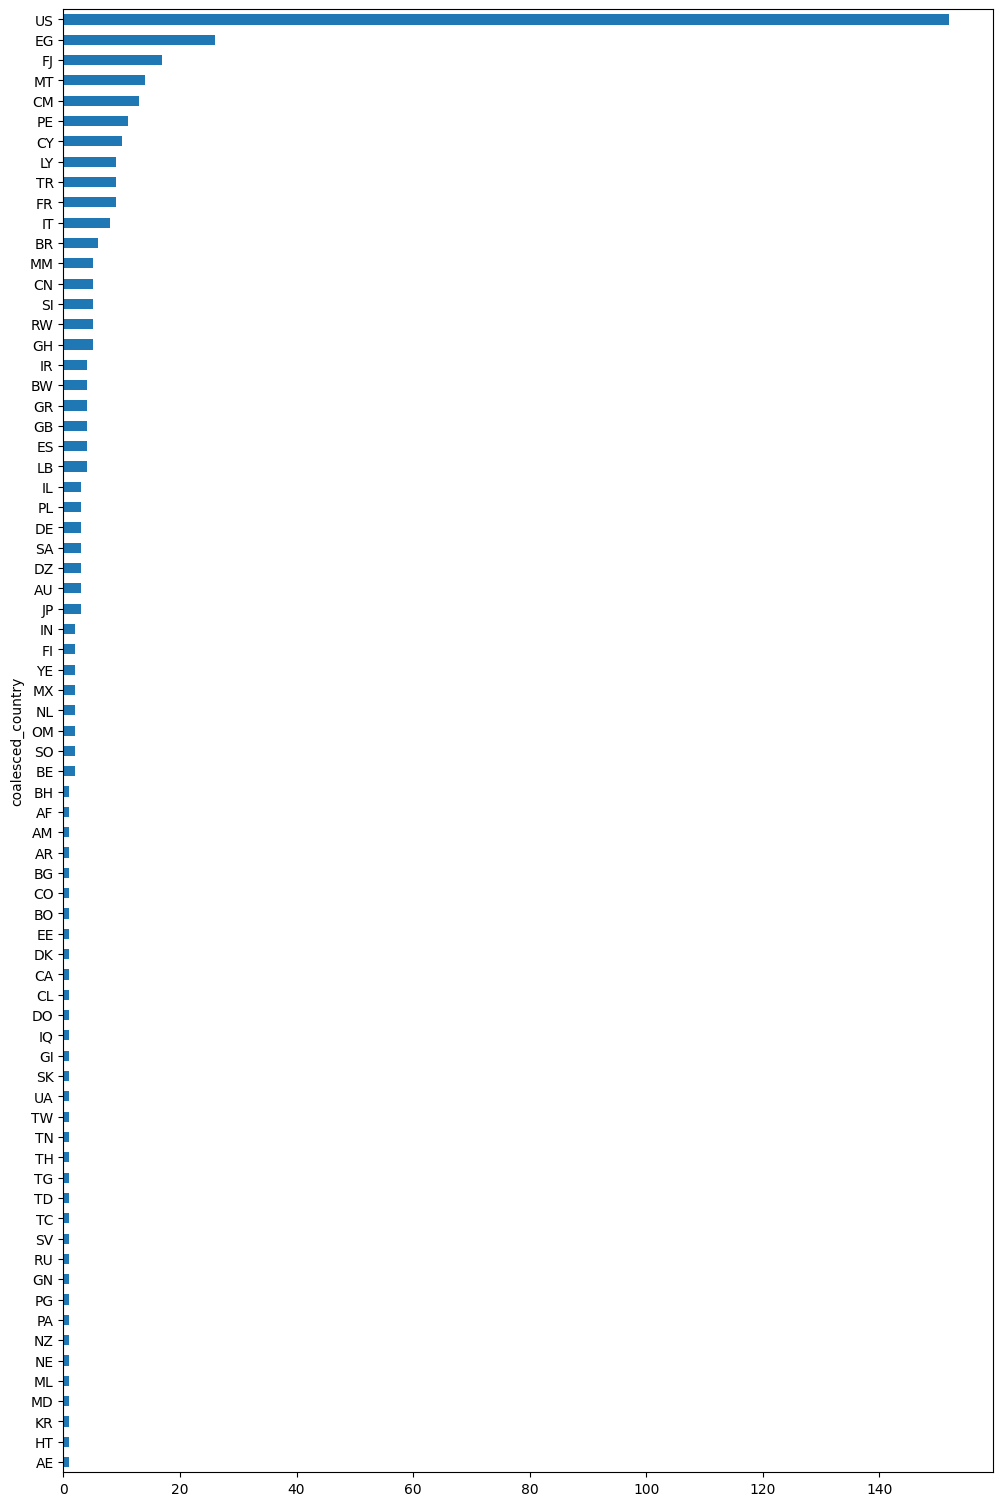

In [47]:
gps_disruption_df[gps_disruption_df['coalesced_country'].notna()]\
.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19])

In [48]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='FJ'] #mostly wrong

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
5,09/01/2022 13:09:31 PST,Porter Ranch,Automobile,USER: GPS is positioning vehicle 200-300 feet ...,Mapping Issue,09/13/2022,USER: GPS is positioning vehicle 200-300 feet ...,sent data mapping information.,2022-09-01,None,None,FJ-11,CM-ES,FJ-11,FJ
13,07/30/2022 23:45:00 Eastern African Time,Straits of Hormuz,Marine,USER: Vessel experienced GPS outage while tran...,Unknown Interference,08/23/2022,USER: Vessel experienced GPS outage while tran...,: The GPS Operations Center reviewed the GPS C...,2022-07-30,None,None,FJ-11,CM-OU,FJ-11,FJ
60,11/22/2021 1400 Middle East Time (+3:30),Ras Tanura Freighter anchorage,Marine,USER: We are having problem GPS signal losing ...,Unknown Interference,12/14/2021,USER: We are having problem GPS signal losing ...,: The GPS Operations Center reviewed the GPS C...,2021-11-22,None,None,FJ-11,CM-NO,FJ-11,FJ
91,07/28/2021 1700 (Arabic) Egypt Standard Time (...,At sea,Marine,USER: The vessel was sailing towards port said...,Unknown Interference,09/29/2021,USER: The vessel was sailing towards port said...,: The GPS Operations Center reviewed the GPS C...,2021-07-28,None,None,None,FJ-11,FJ-11,FJ
133,01/28/2021 20:00 CST,Houston,Other,Interference seems to be in the 1580-1600 MHz ...,Unknown Interference,05/03/2021,Interference seems to be in the 1580-1600 MHz ...,: The GPS Operations Center reviewed the GPS C...,2021-01-28,None,None,None,FJ-01,FJ-01,FJ
138,01/16/2021 01:33 UTC,Global,Surveying,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit,07/19/2021,CNES has detected a repetition of IODE for PRN...,: The GPS Operations Center reviewed the GPS C...,2021-01-16,None,None,FJ-01,None,FJ-01,FJ
151,09/29/2020 1436 EEST,transiting inside Suez Canal N-bound,Marine,User: DGPS available on both. We switched also...,Unknown Interference,10/27/2020,User: DGPS available on both. We switched also...,: The GPS Operations Center reviewed the GPS C...,2020-09-29,None,None,FJ-11,RW-02,FJ-11,FJ
152,09/25/2020 0145 GMT,Mediterranean Sea,Marine,User: Additional vessel in area were experienc...,Unknown Interference,10/20/2020,User: Additional vessel in area were experienc...,: The GPS Operations Center reviewed the GPS C...,2020-09-25,None,None,FJ-11,DZ-43,FJ-11,FJ
154,09/25/2020 0130 GMT,Mediterranean Sea,Marine,User: Intermittent GPS signal beginning at 013...,Unknown Interference,10/20/2020,User: Intermittent GPS signal beginning at 013...,: The GPS Operations Center reviewed the GPS C...,2020-09-25,None,None,FJ-11,FR-01,FJ-11,FJ
169,08/04/2020 08:42 UTC,Global,Surveying,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation,10/27/2020,User: CNES (Centre National d Etudes Spatiales...,: The GPS Operations Center reviewed the GPS C...,2020-08-04,None,None,FJ-01,CM-CE,FJ-01,FJ


In [49]:
for user_desc in gps_disruption_df[gps_disruption_df['coalesced_country']=='FJ'] ['User']:
    print (user_desc)

USER: GPS is positioning vehicle 200-300 feet east or west of actual location in the Los Angeles area. 
USER: Vessel experienced GPS outage while transiting Hormuz Strait West bound . 
USER: We are having problem GPS signal losing “EPFS”. on our vessel. She is running up and down north of RTE-7 anchorage/east of tanker anchorage Ras Tunara Freighter Anchorage KSA . Please check and advise.In same area we have checked many vessels with the same problem.. 
USER: The vessel was sailing towards port said when we first encountered interference, we are now at am anchorage position out of Suez canal and the interference keeps occuring at intervals of about 10 minutes. 
Interference seems to be in the 1580-1600 MHz band. 
CNES has detected a repetition of IODE for PRN09/SVN68 on January 16th, 2021. 
User: DGPS available on both. We switched also to gps only but get same errors. Restarted them one by one interlinking the other with the systems, but get the same result. 
User: Additional vessel 

In [50]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='MT']  #mostly correct, not always

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
20,06/13/2022 00:08:31 Middle East Time,Abu Musa Island,Marine,Merchant ship departed Das Island and was outb...,Unknown Interference,08/23/2022,Merchant ship departed Das Island and was outb...,: The GPS Operations Center reviewed the GPS C...,2022-06-13,None,None,MT-20,AE-DU,MT-20,MT
67,11/04/2021 02:14 CET,Marsaxlokk. Malta,Marine,User indicated an intermittent problem that wa...,Unknown Interference,12/14/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-11-04,MT,NaN,NaN,NaN,MT,MT
99,06/26/2021 0600 UTC,East of Malta,Marine,"User: Vessel bound from Algeciras, Spain to Po...",Unknown Interference,07/19/2021,"User: Vessel bound from Algeciras, Spain to Po...",: The GPS Operations Center reviewed the GPS C...,2021-06-26,MT,NaN,NaN,NaN,MT,MT
100,06/22/2021 0400 EEST,"At sea, 70NM East of Malta",Marine,User: Please be informed that early morning to...,Unknown Interference,07/19/2021,User: Please be informed that early morning to...,: The GPS Operations Center reviewed the GPS C...,2021-06-22,MT,NaN,NaN,NaN,MT,MT
107,05/25/2021 22:00 EEST,"Malta Channel, Med",Marine,USER: All ships in the vicinity (60 nm reach o...,Unknown Interference,06/08/2021,USER: All ships in the vicinity (60 nm reach o...,: The GPS Operations Center reviewed the GPS C...,2021-05-25,MT,NaN,NaN,NaN,MT,MT
119,05/02/2021 21:57 GMT,PANTELERIA ISLAND,Marine,User indicated an intermittent problem that wa...,Unknown Interference,05/27/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-05-02,None,None,MT-20,PE-ICA,MT-20,MT
122,04/21/2021 0039 GMT,Malta Channel,Marine,USER: GPS signal lost for 2 minutes. NAVCEN: T...,Unknown Interference,05/03/2021,USER: GPS signal lost for 2 minutes.,: The GPS Operations Center reviewed the GPS C...,2021-04-21,MT,NaN,NaN,NaN,MT,MT
128,02/10/2021 04:00 EEST,Between Malta and Sicily,Marine,User indicated an intermittent problem that wa...,Unknown Interference,03/01/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-02-10,MT,NaN,NaN,NaN,MT,MT
156,09/22/2020 1700 EEST,East of Malta,Marine,User: Ships in immediate vicinity are understo...,Unknown Interference,10/20/2020,User: Ships in immediate vicinity are understo...,: The GPS Operations Center reviewed the GPS C...,2020-09-22,MT,NaN,NaN,NaN,MT,MT
166,08/19/2020 09:20 CET,Hal-Far,Other,User: The Malta Communications Authority has i...,Unknown Interference,09/10/2020,User: The Malta Communications Authority has i...,: The GPS Operations Center reviewed the GPS C...,2020-08-19,None,MT,None,PE-ICA,MT,MT


In [51]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='CM']  #mostly wrong

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
68,11/01/2021 12pm Indiana Eastern Standard Time,Driving West into South Bend on I80,Automobile,USER: Mercedes Sprinter van says no GPS satell...,Insufficient Information,12/14/2021,USER: Mercedes Sprinter van says no GPS satell...,": Requested additional information, but there ...",2021-11-01,None,None,CM-SU,TR-65,CM-SU,CM
95,07/07/2021 1530 EEST,Port Said East Container Terminal,Marine,User: The vessel was just finishing up transit...,Unknown Interference,07/19/2021,User: The vessel was just finishing up transit...,: The GPS Operations Center reviewed the GPS C...,2021-07-07,None,None,CM-ES,CM-ES,CM-ES,CM
104,06/04/2021 0540 GMT,South of Sicily,Marine,USER: Various other vessels in the area encoun...,Unknown Interference,06/08/2021,USER: Various other vessels in the area encoun...,: The GPS Operations Center reviewed the GPS C...,2021-06-04,None,None,CM-SU,FR-83,CM-SU,CM
110,05/22/2021 23:23 GMT,East Mediterranean Sea,Marine,User indicated an intermittent problem that wa...,Unknown Interference,05/27/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-05-22,None,None,CM-ES,PE-ICA,CM-ES,CM
123,04/18/2021 1620 GMT,East Mediterranean Sea,Marine,Lost GPS signal for six-minutes from 1620 GMT ...,Unknown Interference,05/03/2021,Lost GPS signal for six-minutes from 1620 GMT ...,: The GPS Operations Center reviewed the GPS C...,2021-04-18,None,None,CM-ES,SI-037,CM-ES,CM
131,02/04/2021 1920 UTC,North of Pantelleria Island Med Sea,Marine,"USER: Vessel bound from Algeciras, Spain to Po...",Unknown Interference,03/01/2021,"USER: Vessel bound from Algeciras, Spain to Po...",: The GPS Operations Center reviewed the GPS C...,2021-02-04,None,EG,CM-NO,CM-NO,CM-NO,CM
142,11/17/2020 11:15 PST,I5 north going through Seattle,Automobile,User: Getting message “unable to connect” on v...,Insufficient Information,12/15/2020,User: Getting message “unable to connect” on v...,: The GPS Operations Center reviewed the GPS C...,2020-11-17,None,None,CM-NO,None,CM-NO,CM
168,08/14/2020 1932 (Arabic) Egypt Standard Time (...,North of Pantelleria Island,Marine,User indicated an intermittent problem that wa...,Unknown Interference,09/10/2020,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2020-08-14,None,None,CM-NO,PE-ICA,CM-NO,CM
185,03/29/2020 +4 Near East Time,South of Hormuz TSS,Marine,User: 2 GPS units aboard the newer is a Furuno...,Unknown Interference,04/22/2020,User: 2 GPS units aboard the newer is a Furuno...,: The GPS Operations Center reviewed the GPS C...,2020-03-29,None,None,CM-SU,SI-037,CM-SU,CM
217,10/14/2019 2200 CST,North Side of West Bay bridge,Other,User: Below is the customer service response r...,User Equipment,10/24/2019,User: Below is the customer service response r...,: The GPS Operations Center reviewed the GPS C...,2019-10-14,None,None,CM-NO,FR-30,CM-NO,CM


In [52]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='PE']  #mostly wrong

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022,USER: Both my standalone gps and phone gps rep...,: The GPS Operations Center reviewed the GPS C...,2022-09-10,None,None,PE-ICA,SI-037,PE-ICA,PE
12,08/02/2022 09:00:00 EST,Cumberland Gap,Automobile,USER: Our car navigation system and our mobile...,Insufficient Information,09/13/2022,USER: Our car navigation system and our mobile...,: The GPS Operations Center reviewed the GPS C...,2022-08-02,None,None,None,PE-ICA,PE-ICA,PE
23,06/08/2022 12:00:00 EST,Eastern Peru,Aviation,"USER: On 6 occurrences over 90 minutes, GPS lo...",Unknown Interference,10/25/2022,"USER: On 6 occurrences over 90 minutes, GPS lo...",: The GPS Operations Center reviewed the GPS C...,2022-06-08,PE,NaN,NaN,NaN,PE,PE
41,03/30/2022 0835 (Arabic) Egypt Standard Time (...,"JIZAN CHANNEL , KSA",Marine,User indicated an intermittent problem that wa...,Unknown Interference,05/04/2022,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2022-03-30,None,None,None,PE-ICA,PE-ICA,PE
61,11/14/2021 0430 EEST,Limassol,Marine,USER: Full GNSS failure.. NAVCEN: The GPS Oper...,Unknown Interference,12/14/2021,USER: Full GNSS failure..,: The GPS Operations Center reviewed the GPS C...,2021-11-14,None,None,PE-LIM,None,PE-LIM,PE
65,11/05/2021 0200 EEST,Limassol,Marine,USER: Complete position and speed failure of a...,Unknown Interference,12/14/2021,USER: Complete position and speed failure of a...,: The GPS Operations Center reviewed the GPS C...,2021-11-05,None,None,PE-LIM,None,PE-LIM,PE
66,11/04/2021 0000 EEST,Limassol,Marine,USER: Intermediate complete loss of position a...,Unknown Interference,12/14/2021,USER: Intermediate complete loss of position a...,: The GPS Operations Center reviewed the GPS C...,2021-11-04,None,None,PE-LIM,None,PE-LIM,PE
76,10/11/2021 1155 GMT,Limassol,Marine,USER:Speed and position draticaly changimng on...,Unknown Interference,10/19/2021,USER:Speed and position draticaly changimng on...,: The GPS Operations Center reviewed the GPS C...,2021-10-11,None,None,PE-LIM,PE-ICA,PE-LIM,PE
77,10/08/2021 1130 GMT,Limassol,Marine,USER: 2 of our 3 gnss systems have been interm...,Unknown Interference,10/19/2021,USER: 2 of our 3 gnss systems have been interm...,: The GPS Operations Center reviewed the GPS C...,2021-10-08,None,None,PE-LIM,FJ-11,PE-LIM,PE
84,09/20/2021 05:06 EEST,Limassol bay,Marine,User: Both GPS position lost 11 satelites trac...,Unknown Interference,12/14/2021,User: Both GPS position lost 11 satelites trac...,: The GPS Operations Center reviewed the GPS C...,2021-09-20,None,None,PE-LIM,PE-LIM,PE-LIM,PE


In [54]:
gps_disruption_df['coalesced_country'].dropna().unique()

array(['US', 'PE', 'FJ', 'FR', 'CN', 'PA', 'GN', 'TH', 'GR', 'MT', 'TR',
       'IR', 'EG', 'EE', 'SI', 'HT', 'RW', 'IQ', 'LY', 'CO', 'YE', 'BE',
       'IL', 'AU', 'BR', 'CY', 'CM', 'PL', 'LB', 'GH', 'GB', 'IT', 'ML',
       'TN', 'DZ', 'TC', 'MX', 'BW', 'TW', 'BH', 'SO', 'IN', 'NL', 'AR',
       'PG', 'MM', 'TD', 'ES', 'AE', 'MD', 'SV', 'SA', 'DK', 'TG', 'NZ',
       'BO', 'DO', 'UA', 'NE', 'OM', 'FI', 'JP', 'AF', 'SK', 'BG', 'CA',
       'AM', 'GI', 'DE', 'KR', 'RU', 'CL'], dtype=object)

In [55]:
gps_disruption_df[gps_disruption_df['Location']=='Channel Islands, CA']['Description'].to_dict()

{401: 'User: Several systems, across all of our assets at sea, all affected NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported outage. Space Weather was reviewed and found unlikely to have impacted GPS performance. No correlating reports from other users or interagency partners. Authorized GPS testing was scheduled within 200 miles of the reported location and may have impacted GPS performance.'}

There is such a thing as https://en.wikipedia.org/wiki/Channel_Islands_(California)

In [56]:
gps_disruption_df[gps_disruption_df['coalesce']=='US-GA']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
8,08/18/2022 10:30:00 EST,Cartersville Georgia,Transportation,USER: Tractor trailers on coming in a resident...,Mapping Issue,08/23/2022,USER: Tractor trailers on coming in a resident...,sent data mapping information to report unaut...,2022-08-18,US-GA,NaN,NaN,NaN,US-GA,US
147,10/20/2020 11:00 am EST,Stockbridge and McDonough GA,Transportation,"User: Kept reporting ""GPS Network Unavailable""...",Insufficient Information,10/27/2020,"User: Kept reporting ""GPS Network Unavailable""...",: The GPS Operations Center reviewed the GPS C...,2020-10-20,US-GA,NaN,NaN,NaN,US-GA,US
366,10/10/2017 0920 EST,"Macon, GA",Other,User: GPS unit could not ﬁx any satellites unt...,User Equipment,05/20/2019,User: GPS unit could not ﬁx any satellites unt...,: The GPS Operations Center reviewed the GPS C...,2017-10-10,US-GA,NaN,NaN,NaN,US-GA,US
405,03/04/2017 2015 EST,"Lyons, GA",Transportation,User: Our home is located on the west side of ...,Mapping Issue,05/20/2019,User: Our home is located on the west side of ...,: User provided information on how to contact ...,2017-03-04,US-GA,NaN,NaN,NaN,US-GA,US


<AxesSubplot: ylabel='matched_user_country_state'>

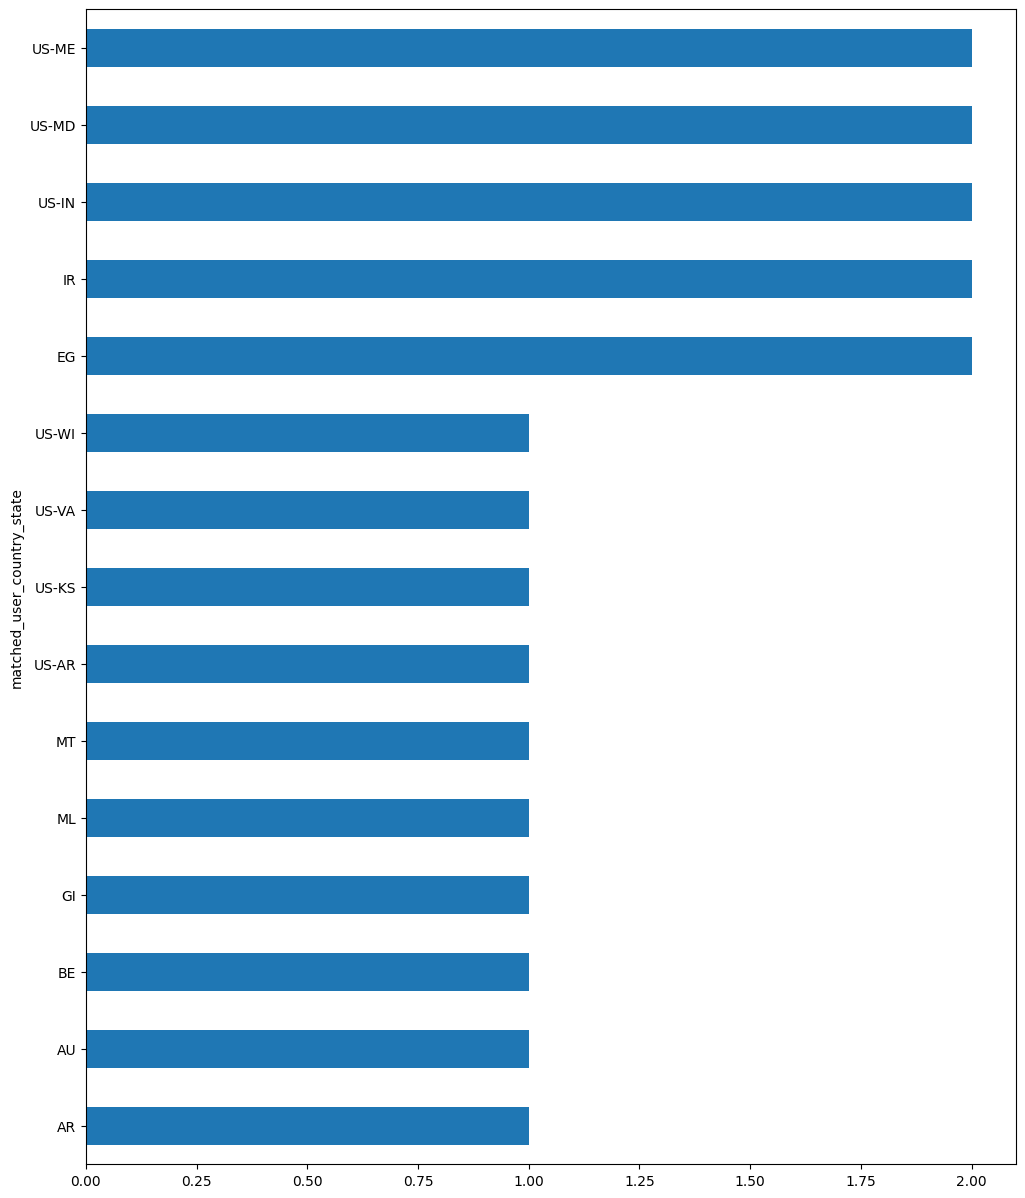

In [57]:
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()]\
.groupby('matched_user_country_state').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

<AxesSubplot: ylabel='matched_location_locode'>

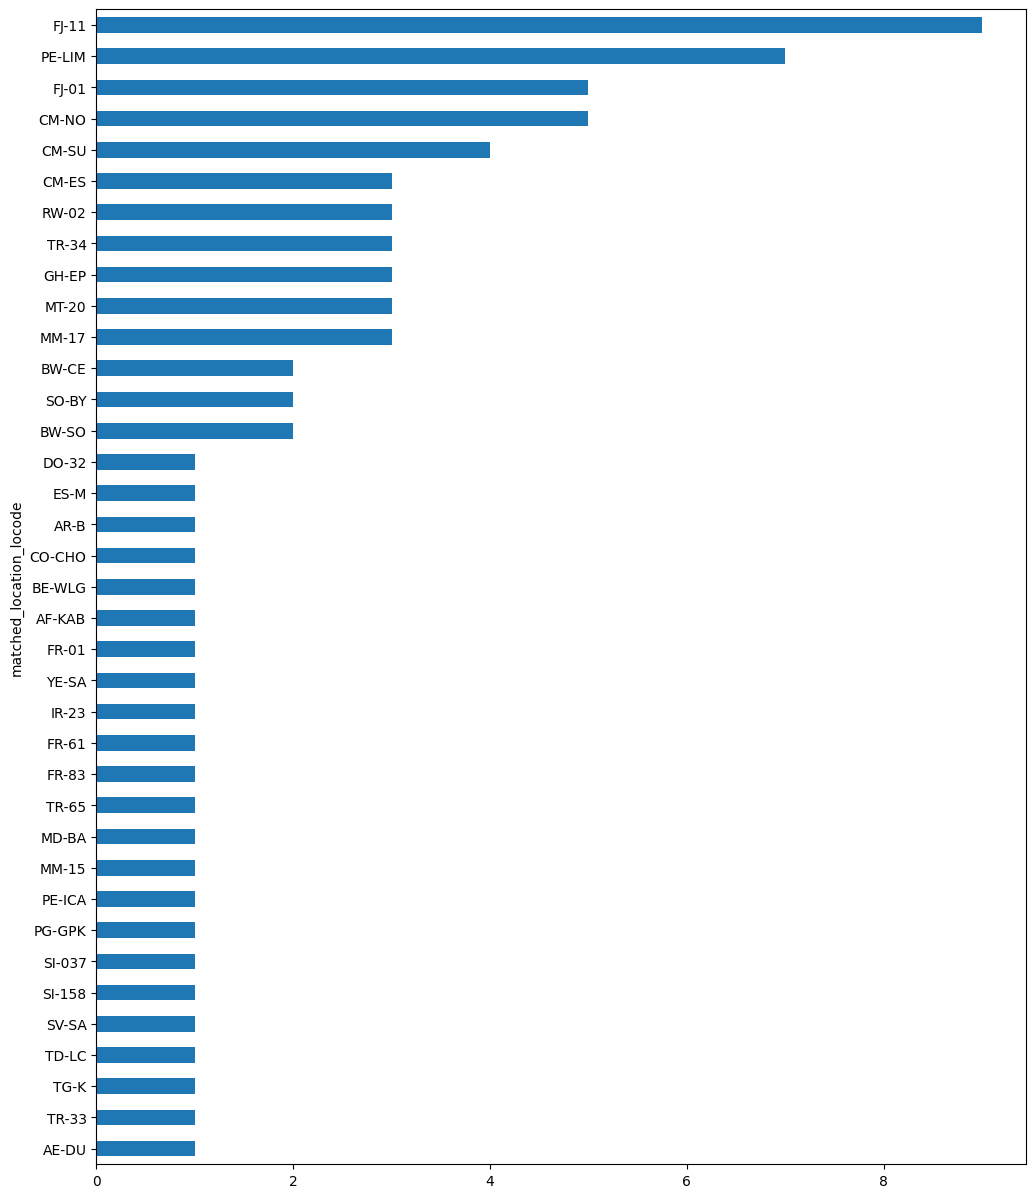

In [58]:
gps_disruption_df[gps_disruption_df['matched_location_locode'].notna()]\
.groupby('matched_location_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

<AxesSubplot: ylabel='matched_user_locode'>

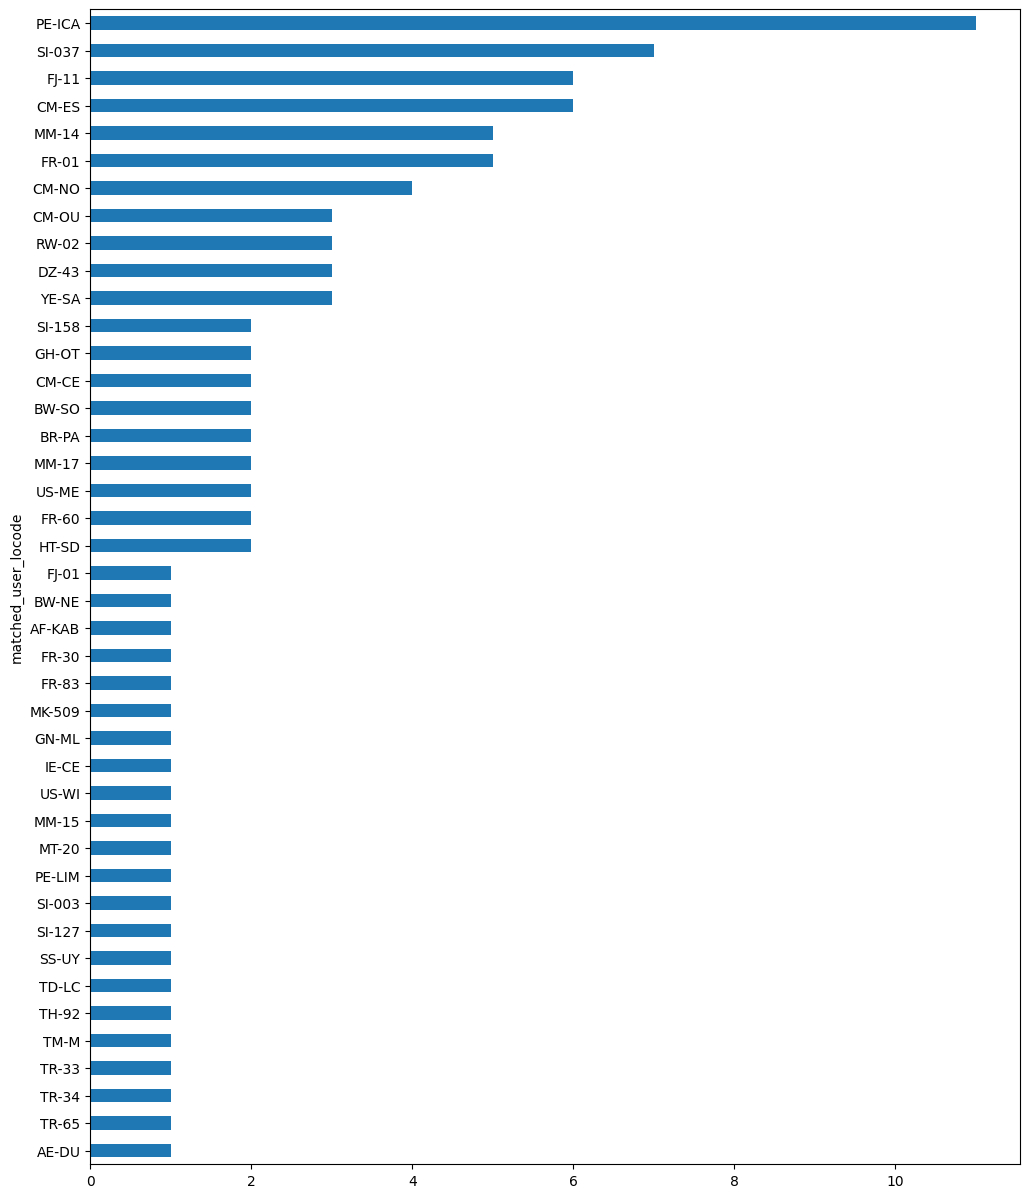

In [59]:
gps_disruption_df[gps_disruption_df['matched_user_locode'].notna()]\
.groupby('matched_user_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

In [60]:
gps_disruption_df[gps_disruption_df['coalesce']=='US-IN']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
293,11/10/2018 09:00 CST,"Evansville, IN",First Responder,User: On 22 October the units began reporting ...,User Equipment,05/08/2019,User: On 22 October the units began reporting ...,: The GPS week number for both dates are the s...,2018-11-10,US-IN,NaN,NaN,NaN,US-IN,US
316,08/03/2018 11:30 EST,"Avon, IN",Other,User: My son wears a GPS watch due to the poss...,User Equipment,05/07/2019,User: My son wears a GPS watch due to the poss...,: The GPS Operations Center reviewed the GPS C...,2018-08-03,US-IN,NaN,NaN,NaN,US-IN,US


In [61]:
gps_disruption_df[gps_disruption_df['matched_location_country_state']=='US-IN']



,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
293,11/10/2018 09:00 CST,"Evansville, IN",First Responder,User: On 22 October the units began reporting ...,User Equipment,05/08/2019,User: On 22 October the units began reporting ...,: The GPS week number for both dates are the s...,2018-11-10,US-IN,NaN,NaN,NaN,US-IN,US
316,08/03/2018 11:30 EST,"Avon, IN",Other,User: My son wears a GPS watch due to the poss...,User Equipment,05/07/2019,User: My son wears a GPS watch due to the poss...,: The GPS Operations Center reviewed the GPS C...,2018-08-03,US-IN,NaN,NaN,NaN,US-IN,US


In [62]:
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()]




,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,USER: My mapping services are constantly searc...,sent data mapping information.,2022-10-16,None,US-KS,None,YE-SA,US-KS,US
6,09/01/2022 16:51:00 Eastern African Time,Mesaieed Main Ship Channel,Marine,USER: At 1651 while transiting Mesaieed Main S...,Unknown Interference,09/13/2022,USER: At 1651 while transiting Mesaieed Main S...,: The GPS Operations Center reviewed the GPS C...,2022-09-01,None,US-ME,FR-01,US-ME,FR-01,FR
33,05/04/2022 9:00am EST,Perryville,Automobile,"Google Maps for address in Perryville, MD prov...",Mapping Issue,05/25/2022,"Google Maps for address in Perryville, MD prov...",sent data mapping information.,2022-05-04,None,US-MD,None,PE-ICA,US-MD,US
37,04/18/2022 11:35:42 PST,Chocolate Mountain,Other,"USER: Unit acquired new in 2010, with no previ...",User Equipment,05/04/2022,"USER: Unit acquired new in 2010, with no previ...",: Provided reporting source information for ma...,2022-04-18,None,US-ME,CO-CHO,US-ME,CO-CHO,CO
42,03/29/2022 10:00 a.m. CET,Dunkirk,Automobile,USER: The GPS was confused; repeatedly gave in...,Insufficient Information,05/04/2022,USER: The GPS was confused; repeatedly gave in...,: The GPS Operations Center reviewed the GPS C...,2022-03-29,None,US-MD,None,BW-SO,US-MD,US
50,01/28/2022 6:30 pm CST,sikeston,Automobile,USER: in southeast Missouri it shows GPS fail ...,Insufficient Information,04/05/2022,USER: in southeast Missouri it shows GPS fail ...,: The GPS Operations Center reviewed the GPS C...,2022-01-28,None,US-AR,RW-02,BW-NE,RW-02,RW
93,"07/21/2021 15,45 (Arabic) Egypt Standard Time ...",Харьков,Research,"USER: Good afternoon, we have been observing a...",Unknown Interference,09/29/2021,"USER: Good afternoon, we have been observing a...",: The GPS Operations Center reviewed the GPS C...,2021-07-21,None,ML,None,GN-ML,ML,ML
120,04/28/2021 2012 EEST,Eastern Mediterranean,Transportation,USER: roughly 12 hours of gps spoofing upon de...,Unknown Interference,05/27/2021,USER: roughly 12 hours of gps spoofing upon de...,: The GPS Operations Center reviewed the GPS C...,2021-04-28,None,EG,GH-EP,FJ-11,GH-EP,GH
131,02/04/2021 1920 UTC,North of Pantelleria Island Med Sea,Marine,"USER: Vessel bound from Algeciras, Spain to Po...",Unknown Interference,03/01/2021,"USER: Vessel bound from Algeciras, Spain to Po...",: The GPS Operations Center reviewed the GPS C...,2021-02-04,None,EG,CM-NO,CM-NO,CM-NO,CM
136,01/19/2021 1200 CST,Ellison Bay,Marine,USER: GPS NAIS disruption at tower at Ellison ...,Unintentional Interference,03/31/2021,USER: GPS NAIS disruption at tower at Ellison ...,: The GPS Operations Center reviewed the GPS C...,2021-01-19,None,US-WI,SO-BY,US-WI,SO-BY,SO


### Unmatched location needs cleaning

In [63]:
disruptions_by_location=gps_disruption_df[gps_disruption_df['coalesce'].isna()].groupby('Location').count()['Disruption Date/Time']


In [64]:
disruptions_by_location[disruptions_by_location>1].sort_values(ascending=False)#.plot(kind='barh')

Series([], Name: Disruption Date/Time, dtype: int64)

In [65]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description','Cause','matched_location_country_state']]

,local_date,Location,Description,Cause,matched_location_country_state
91,2021-07-28,At sea,USER: The vessel was sailing towards port said...,Unknown Interference,None
138,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit,None
169,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation,None
195,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a...",ICD_Violation,None
286,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...,None,None
356,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...,User Equipment,None
372,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...,User Equipment,None


In [66]:
gps_disruption_df.query('Location=="United States"')[['Description','matched_location_country_state']]

,Description,matched_location_country_state
277,At roughly 8:45 PM CST lost GPS Sync to variou...,US
287,User: Observation of GPS NANU times in relatio...,US


In [67]:
for description_str in gps_disruption_df.query('Location=="United States"')['Description']:
    print(description_str)

At roughly 8:45 PM CST lost GPS Sync to various cell sites around the US. The common GPS is trend is dual cones feeding sync to UMTS and LTE technologies. To mitigate the issue Field Technicians have removed one of the GPS cones and have a master sync from LTE feeding UMTS. There was no back office or architectural changes to our network during this time that would have caused this failure. We are curious if there were any changes made in preparation of the GPS System rollover slated for tomorrow April 6th that may have affected the base stations to lose sync. NAVCEN: The U.S. Air Force points to Interface Specification IS-GPS-200, paragraph 20.3.3.5.2.2, Almanac Reference Time, which states: "The almanac reference time, t(oa), is some some multiple of 2(12) seconds occurring approximately 70 hours after the first valid transmission time for this almanac data set (reference 20.3.4.5). The almanac is updated often enough to ensure that GPS time, t, shall differ from t(oa) by less than 3

In [68]:
gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')\
[['Description','matched_location_country_state','matched_user_country_state','NAVCEN']]

,Description,matched_location_country_state,matched_user_country_state,NAVCEN
110,User indicated an intermittent problem that wa...,None,None,: The GPS Operations Center reviewed the GPS C...
120,USER: roughly 12 hours of gps spoofing upon de...,None,EG,: The GPS Operations Center reviewed the GPS C...
123,Lost GPS signal for six-minutes from 1620 GMT ...,None,None,: The GPS Operations Center reviewed the GPS C...
124,"GPS jamming begins, affecting both GPS units. ...",None,None,: The GPS Operations Center reviewed the GPS C...
152,User: Additional vessel in area were experienc...,None,None,: The GPS Operations Center reviewed the GPS C...
154,User: Intermittent GPS signal beginning at 013...,None,None,: The GPS Operations Center reviewed the GPS C...


In [69]:
for description_str in gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')\
['Description']:
    print(description_str)

User indicated an intermittent problem that was otherwise unspecified. NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from interagency partners. The report of interference is similar to that outlined by U.S. Maritime Administration in Maritime Advisory 2021-004-Various GPS Interference. User encouraged to report the issue to the nearest communication authority.
USER: roughly 12 hours of gps spoofing upon departure from port Said Egypt. GPS signal rapidly shifted numerous times, position 6-8 miles off. Position dropped for 90 percent of the 12 hours. GPS aboard connected to ECDIS, RADAR,AIS, GYRO repeater panel, GMDSS suite. NAVCEN: The GPS Operations Center reviewed the GPS Constella

### Unmatched locations

In [70]:
gps_disruption_df[gps_disruption_df['coalesce'].isna()]

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_user_country_state,matched_location_locode,matched_user_locode,coalesce,coalesced_country
19,06/14/2022 12:08:31 China Taiwan Time,Gulei,Marine,"USER: ""No Fix"" displayed on screen NAVCEN: The...",Unknown Interference,07/06/2022,"USER: ""No Fix"" displayed on screen",: The GPS Operations Center reviewed the GPS C...,2022-06-14,None,None,None,None,None,None
48,02/03/2022 21.30 UTC,Dammam port KSA,Marine,USER: At the time of disruption all GPS used o...,Unknown Interference,02/09/2022,USER: At the time of disruption all GPS used o...,: The GPS Operations Center reviewed the GPS C...,2022-02-03,None,None,None,None,None,None
64,11/05/2021 12.00 PST,Brooklyn,Other,USER: The maps wont go to any locations or giv...,Mapping Issue,02/09/2022,USER: The maps wont go to any locations or giv...,sent data mapping inforamtion.,2021-11-05,None,None,None,None,None,None
75,10/12/2021 9am Phoenix Standard Time,Phoenix,Surveying,USER: The surveyor worked in the same area wit...,Insufficient Information,12/14/2021,USER: The surveyor worked in the same area wit...,: The GPS Operations Center reviewed the GPS C...,2021-10-12,None,None,None,None,None,None
111,05/17/2021 4 pm CST,Dallas,Automobile,Google maps down. Possible widespread gps prob...,Mapping Issue,05/27/2021,Google maps down. Possible widespread gps prob...,: Provided reporting source the website inform...,2021-05-17,None,None,None,None,None,None
113,05/13/2021 20:00 UTC,Marthas Vinyard,Surveying,USER: Lost GPS on 4 vessels at the same time. ...,Insufficient Information,05/27/2021,USER: Lost GPS on 4 vessels at the same time. ...,: The GPS Operations Center reviewed the GPS C...,2021-05-13,None,None,None,None,None,None
121,04/23/2021 00:00 Eastern African Time,Jeddah - 3nm before the port limit,Marine,USER: For the length of our stay 23/0000 till ...,Unknown Interference,05/27/2021,USER: For the length of our stay 23/0000 till ...,: The GPS Operations Center reviewed the GPS C...,2021-04-23,None,None,None,None,None,None
167,08/15/2020 1900 EST,Far Rockaway,Transportation,"User: Today as well as Friday, we kept receivi...",Insufficient Information,09/10/2020,"User: Today as well as Friday, we kept receivi...",: The GPS Operations Center reviewed the GPS C...,2020-08-15,None,None,None,None,None,None
170,07/30/2020 1400 UTC,Suez Canal,Marine,User: Intermittent alarm on all equipment conn...,Unknown Interference,08/19/2020,User: Intermittent alarm on all equipment conn...,: The GPS Operations Center reviewed the GPS C...,2020-07-30,None,None,None,None,None,None
197,01/14/2020 8:00 Puerto Rico and US Virgin Isla...,Paso Palma,NaN,User: My GPS position is changing. Beginning o...,Insufficient Information,02/25/2020,User: My GPS position is changing. Beginning o...,: The GPS Operations Center reviewed the GPS C...,2020-01-14,None,None,None,None,None,None


### quantify scale of each subgroup

In [72]:
gps_disruption_df['coalesced_country'].nunique()

72

In [73]:
gps_disruption_df['coalesced_country'].count()

404

In [74]:
gps_disruption_df[gps_disruption_df['coalesced_country'].isna()]['Disruption Date/Time'].count()

15